# Linear Algebra Essentials for Machine Learning

> **Linear algebra is a branch of mathematics that studies linear equations, vectors, matrices, and linear transformations, providing a framework for understanding and modeling phenomena in various fields like physics, engineering, and computer science.**

## Learning Objectives
- Understand vectors as geometric objects and algebraic entities
- Master matrix operations and their geometric interpretations
- Build intuition for linear transformations
- Connect linear algebra concepts to machine learning applications


## 1. Vectors: The Building Blocks

### What is a Vector?
A vector is an ordered list of numbers that can represent:
- **Position**: A point in space
- **Direction**: Which way to go
- **Magnitude**: How far to go

In machine learning, vectors often represent:
- **Features**: Characteristics of data points
- **Weights**: Parameters of our model
- **Gradients**: Directions for optimization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a 2D vector
v = np.array([3, 4])
print(f"Vector v = {v}")
print(f"Magnitude (length) of v = {np.linalg.norm(v):.2f}")
print(f"Direction (unit vector) = {v / np.linalg.norm(v)}")


Vector v = [3 4]
Magnitude (length) of v = 5.00
Direction (unit vector) = [0.6 0.8]


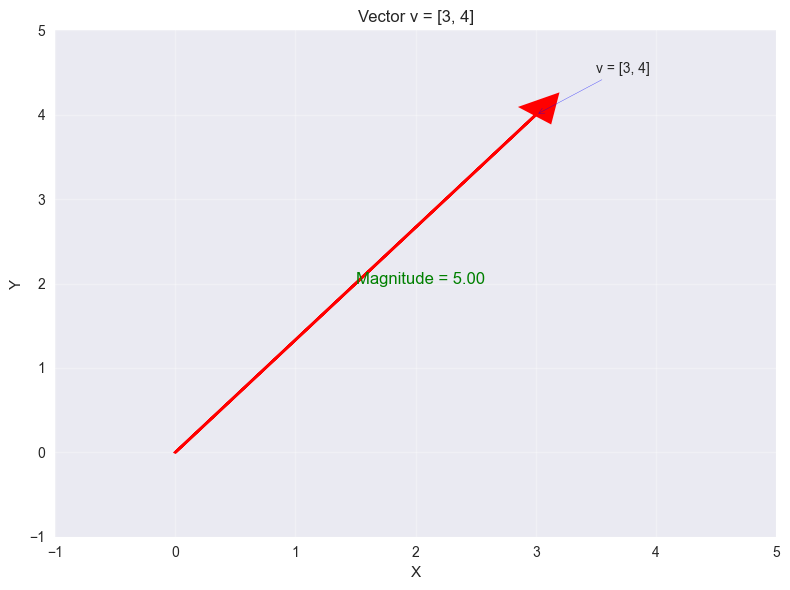

In [2]:
# Visualize the vector
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the vector from origin
ax.arrow(0, 0, v[0], v[1], head_width=0.3, head_length=0.3, fc='red', ec='red', linewidth=2)
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, alpha=0.3)
ax.set_title('Vector v = [3, 4]')

# Add annotations
ax.annotate(f'v = [{v[0]}, {v[1]}]', xy=(v[0], v[1]), xytext=(v[0]+0.5, v[1]+0.5),
            arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7))
ax.annotate(f'Magnitude = {np.linalg.norm(v):.2f}', xy=(1.5, 2), fontsize=12, color='green')

plt.tight_layout()
plt.show()


### Vector Operations

#### 1. Vector Addition
Adding vectors means moving in the direction of the first vector, then the second.


v1 = [2 1]
v2 = [1 3]
v1 + v2 = [3 4]


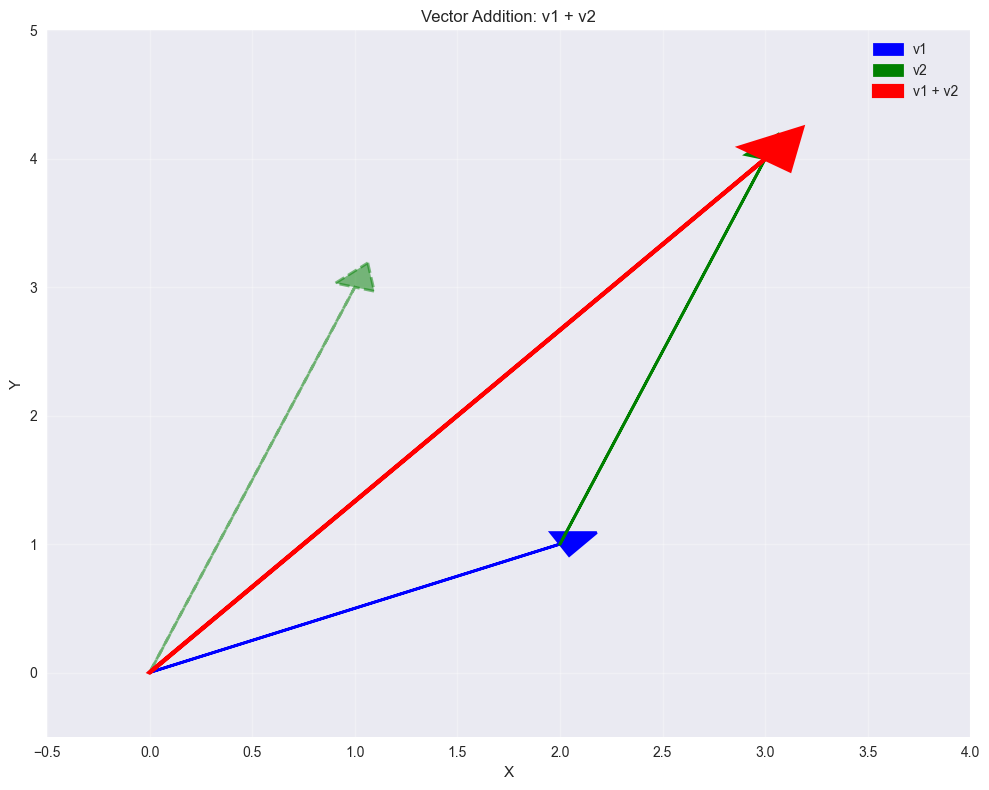

In [3]:
# Vector addition
v1 = np.array([2, 1])
v2 = np.array([1, 3])
v_sum = v1 + v2

print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"v1 + v2 = {v_sum}")

# Visualize vector addition
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot v1
ax.arrow(0, 0, v1[0], v1[1], head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=2, label='v1')

# Plot v2 from the end of v1
ax.arrow(v1[0], v1[1], v2[0], v2[1], head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=2, label='v2')

# Plot v2 from origin (to show parallelogram)
ax.arrow(0, 0, v2[0], v2[1], head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=2, alpha=0.5, linestyle='--')

# Plot the sum
ax.arrow(0, 0, v_sum[0], v_sum[1], head_width=0.3, head_length=0.3, fc='red', ec='red', linewidth=3, label='v1 + v2')

ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('Vector Addition: v1 + v2')

plt.tight_layout()
plt.show()


#### 2. Scalar Multiplication
Multiplying a vector by a scalar changes its magnitude but not its direction (unless the scalar is negative).


Original vector v = [2 1]
Scalar = 2.5
Scaled vector = [5.  2.5]
Original magnitude = 2.24
Scaled magnitude = 5.59


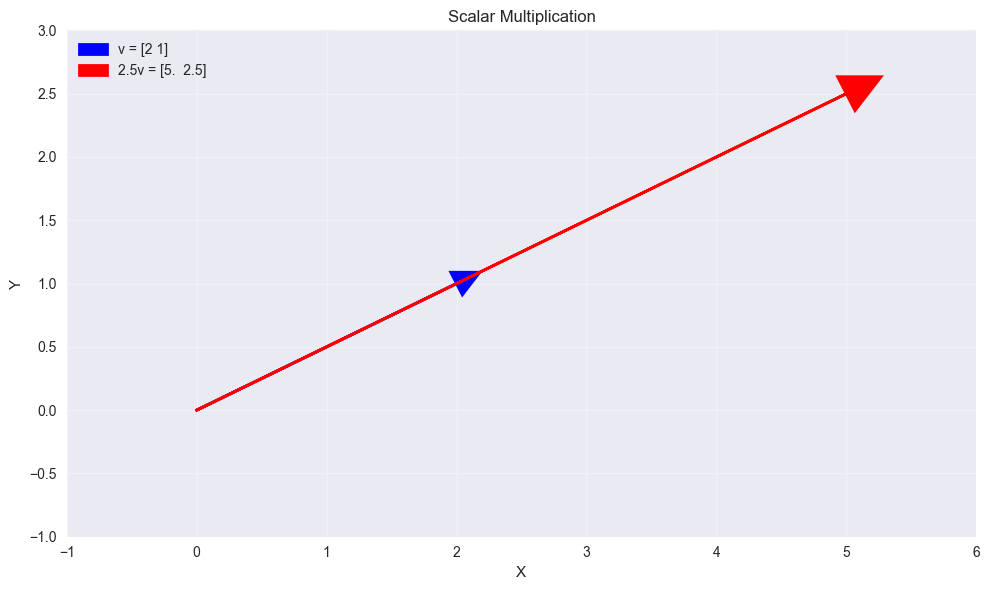

In [4]:
# Scalar multiplication
v = np.array([2, 1])
scalar = 2.5
v_scaled = scalar * v

print(f"Original vector v = {v}")
print(f"Scalar = {scalar}")
print(f"Scaled vector = {v_scaled}")
print(f"Original magnitude = {np.linalg.norm(v):.2f}")
print(f"Scaled magnitude = {np.linalg.norm(v_scaled):.2f}")

# Visualize scalar multiplication
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot original vector
ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=2, label=f'v = {v}')

# Plot scaled vector
ax.arrow(0, 0, v_scaled[0], v_scaled[1], head_width=0.3, head_length=0.3, fc='red', ec='red', linewidth=2, label=f'{scalar}v = {v_scaled}')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('Scalar Multiplication')

plt.tight_layout()
plt.show()


#### 3. Dot Product (Inner Product)
The dot product measures how much two vectors point in the same direction.

**Mathematical definition:** $\vec{a} \cdot \vec{b} = \sum_{i=1}^{n} a_i b_i$

**Geometric interpretation:** $\vec{a} \cdot \vec{b} = |\vec{a}||\vec{b}|\cos(\theta)$

Where $\theta$ is the angle between the vectors.


In [5]:
# Dot product examples
a = np.array([3, 4])
b = np.array([1, 2])

# Method 1: Using numpy.dot()
dot_product1 = np.dot(a, b)

# Method 2: Using @ operator
dot_product2 = a @ b

# Method 3: Manual calculation
dot_product3 = np.sum(a * b)

print(f"Vector a = {a}")
print(f"Vector b = {b}")
print(f"Dot product (method 1) = {dot_product1}")
print(f"Dot product (method 2) = {dot_product2}")
print(f"Dot product (method 3) = {dot_product3}")

# Calculate angle between vectors
cos_theta = dot_product1 / (np.linalg.norm(a) * np.linalg.norm(b))
theta_radians = np.arccos(cos_theta)
theta_degrees = np.degrees(theta_radians)

print(f"\nAngle between vectors: {theta_degrees:.2f} degrees")
print(f"Cosine of angle: {cos_theta:.4f}")


Vector a = [3 4]
Vector b = [1 2]
Dot product (method 1) = 11
Dot product (method 2) = 11
Dot product (method 3) = 11

Angle between vectors: 10.30 degrees
Cosine of angle: 0.9839


## 2. Matrices: The Power Tools

### What is a Matrix?
A matrix is a rectangular array of numbers arranged in rows and columns.

In machine learning, matrices represent:
- **Data**: Each row is a sample, each column is a feature
- **Transformations**: How to change data from one space to another
- **Weights**: Parameters of neural networks
- **Covariance**: Relationships between features


In [6]:
# Creating matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

print(f"Matrix A (2x3):\n{A}")
print(f"\nMatrix B (3x2):\n{B}")
print(f"\nShape of A: {A.shape}")
print(f"Shape of B: {B.shape}")

# Matrix multiplication
C = np.dot(A, B)  # or A @ B
print(f"\nA @ B =\n{C}")
print(f"\nShape of result: {C.shape}")

# Manual calculation to understand the process
print("\nManual calculation:")
print(f"C[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0] = {A[0,0]}*{B[0,0]} + {A[0,1]}*{B[1,0]} + {A[0,2]}*{B[2,0]} = {A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]}")
print(f"C[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1] + A[0,2]*B[2,1] = {A[0,0]}*{B[0,1]} + {A[0,1]}*{B[1,1]} + {A[0,2]}*{B[2,1]} = {A[0,0]*B[0,1] + A[0,1]*B[1,1] + A[0,2]*B[2,1]}")


Matrix A (2x3):
[[1 2 3]
 [4 5 6]]

Matrix B (3x2):
[[ 7  8]
 [ 9 10]
 [11 12]]

Shape of A: (2, 3)
Shape of B: (3, 2)

A @ B =
[[ 58  64]
 [139 154]]

Shape of result: (2, 2)

Manual calculation:
C[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0] = 1*7 + 2*9 + 3*11 = 58
C[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1] + A[0,2]*B[2,1] = 1*8 + 2*10 + 3*12 = 64


## 3. Applications in Machine Learning

### 1. Principal Component Analysis (PCA)
PCA finds the directions of maximum variance in data using eigenvectors.


Covariance matrix:
[[2.25014904 0.65085753]
 [0.65085753 0.83784916]]

Eigenvalues: [2.50434449 0.58365371]
Eigenvectors:
[[ 0.93147955 -0.36379369]
 [ 0.36379369  0.93147955]]


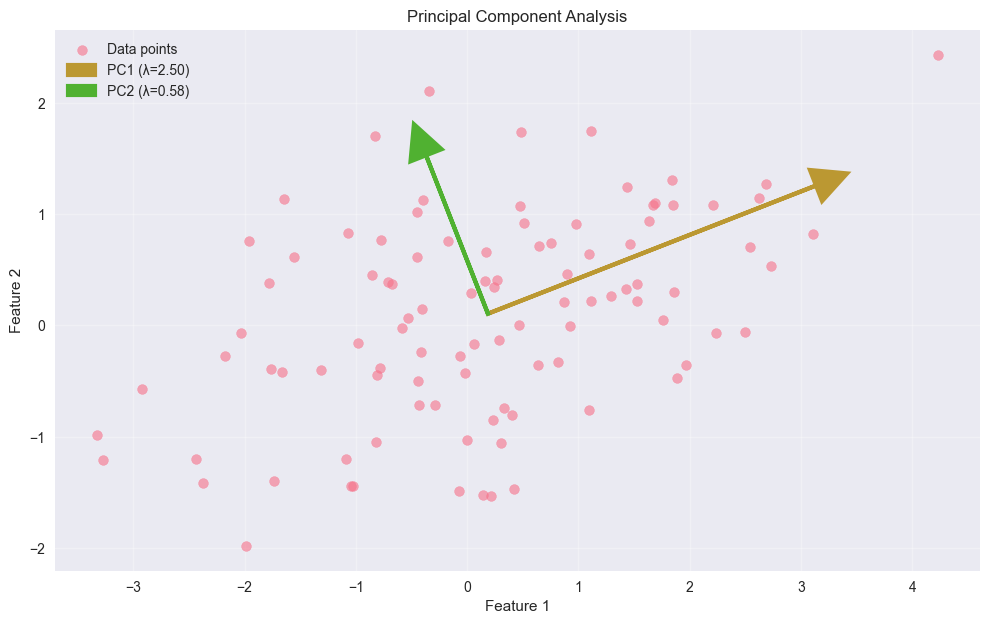

In [7]:
# Generate sample data
np.random.seed(42)
n_samples = 100
X = np.random.multivariate_normal([0, 0], [[3, 1], [1, 1]], n_samples)

# Calculate covariance matrix
cov_matrix = np.cov(X.T)
print(f"Covariance matrix:\n{cov_matrix}")

# Find eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

# Sort by eigenvalue (descending)
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]

print(f"\nEigenvalues: {eigenvals}")
print(f"Eigenvectors:\n{eigenvecs}")

# Visualize PCA
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot data points
ax.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50, label='Data points')

# Plot eigenvectors (scaled by eigenvalues)
center = np.mean(X, axis=0)
for i, (eigenval, eigenvec) in enumerate(zip(eigenvals, eigenvecs.T)):
    scale = 2 * np.sqrt(eigenval)  # Scale by standard deviation
    ax.arrow(center[0], center[1], 
             eigenvec[0] * scale, eigenvec[1] * scale,
             head_width=0.3, head_length=0.3, 
             fc=f'C{i+1}', ec=f'C{i+1}', linewidth=3,
             label=f'PC{i+1} (λ={eigenval:.2f})')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_title('Principal Component Analysis')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


### 2. Linear Regression
Linear regression uses matrix operations to find the best line through data points.


True parameters: slope=2, intercept=3
Estimated parameters: slope=1.88, intercept=3.13


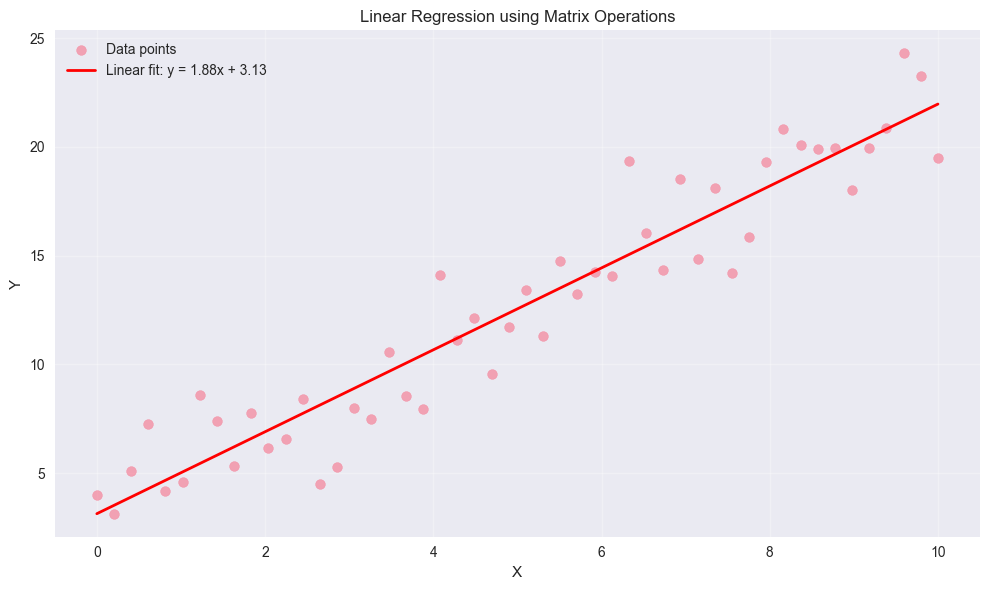

In [8]:
# Generate sample data for linear regression
np.random.seed(42)
n_points = 50
x = np.linspace(0, 10, n_points)
y = 2 * x + 3 + np.random.normal(0, 2, n_points)  # y = 2x + 3 + noise

# Prepare data for matrix operations
X = np.column_stack([np.ones(n_points), x])  # Add bias term
y = y.reshape(-1, 1)

# Normal equation: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"True parameters: slope=2, intercept=3")
print(f"Estimated parameters: slope={theta[1,0]:.2f}, intercept={theta[0,0]:.2f}")

# Make predictions
y_pred = X @ theta

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, s=50, label='Data points')
plt.plot(x, y_pred, 'r-', linewidth=2, label=f'Linear fit: y = {theta[1,0]:.2f}x + {theta[0,0]:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Linear Regression using Matrix Operations')
plt.tight_layout()
plt.show()


## Key Takeaways

1. **Vectors** are the building blocks of machine learning - they represent features, weights, and data points
2. **Matrices** are powerful tools for transformations, data representation, and computations
3. **Linear transformations** help us understand how data changes in different spaces
4. **Eigenvalues and eigenvectors** reveal the fundamental structure of data
5. **Matrix operations** are the computational foundation of most ML algorithms

## Next Steps

Now that you understand linear algebra, you're ready to explore:
- **Probability and Statistics** - How to handle uncertainty in data
- **Supervised Learning** - How to learn from labeled data
- **Unsupervised Learning** - How to find patterns in unlabeled data
